In [1]:
from scipy import integrate as inte
import numpy as np
import matplotlib.pyplot as plt
from numpy import log as ln
G = 6.674E-11  # m^3 kg^-1 s^-2
Msun = 1.989E30  # kg
import numpy as np
import numpy.ma as ma
from scipy.special import kn
from scipy.special import iv
gamma = 3.3308
kappa = gamma * ln(10)

In [2]:
r = np.linspace(0.01,30,1000)

# de Vaucouleur's Bulge
(Sofue 2013, eqn 27, 29, & 30)

$$\Sigma(r) = \Sigma_{be} (-\kappa (\frac{r}{r_b})^{\frac{1}{4}} - 1)$$

$$\rho(R) = \frac{1}{\pi}\int^{\infty}_R \frac{d\Sigma_b(x)}{dx}\frac{1}{\sqrt{x^2 - R^2}}dx$$

$$M_b(R) = 4\pi\int^{R}_{0} \rho(R') R'^2dR' $$

$$V_b(R) = \sqrt{\frac{GM_b(R)}{R}}$$

<ipython-input-3-feae343c4592>:27: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  bulge_mass[i],err[i] = inte.quad(mass_integrand, 0, r[i], args=(SigBE, Rb))
<ipython-input-3-feae343c4592>:27: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  bulge_mass[i],err[i] = inte.quad(mass_integrand, 0, r[i], args=(SigBE, Rb))


Text(0.5, 1.0, 'MW Bulge [de Vaucouleur]')

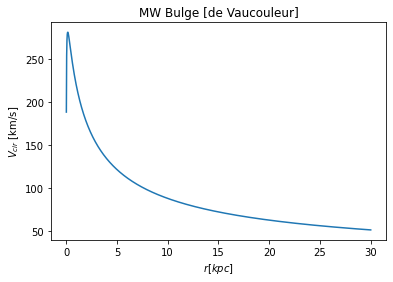

In [3]:
def sigma_b(x, SigBE, Rb):
    return SigBE * np.exp(-1 * kappa * ((x / Rb) ** 0.25 - 1))


# derivative of sigma with respect to r
def dsdx(x, SigBE, Rb):
    return sigma_b(x, SigBE, Rb) * (-0.25 * kappa) * (Rb ** -0.25) * (x ** -0.75)


# integrand for getting denisty
def density_integrand(x, r, SigBE, Rb):
    return -(1 / np.pi) * dsdx(x, SigBE, Rb) / np.sqrt(x ** 2 - r ** 2)


def mass_integrand(r, SigBE, Rb):
    vol_den, vol_den_err = inte.quad(density_integrand, r, np.inf, args=(r, SigBE, Rb))
    return 4 * np.pi * vol_den * r ** 2

def vcir_b(r,SigBE, Rb):
    if isinstance(r, float):
        bulge_mass, m_err = inte.quad(mass_integrand, 0, r, args=(SigBE, Rb))
    else:
        bulge_mass = np.zeros(len(r))
        err = np.zeros(len(r))

        for i in range(len(r)):
            bulge_mass[i],err[i] = inte.quad(mass_integrand, 0, r[i], args=(SigBE, Rb))
    vel = np.sqrt(G*(bulge_mass*Msun)/(r*3.08E16))
    vel /= 1000
    
    return vel

plt.plot(r, vcir_b(r*1000,3.2E3, 0.5E3))
plt.xlabel('$r [kpc]$')
plt.ylabel('$V_{cir}$ [km/s]')
plt.title('MW Bulge [de Vaucouleur]')

# Simplified bulge model 

(Di Paolo et al. 2019 eqn 8)

$$V^2{b}(r) = \alpha_{b} V^2_{in} (\frac{r}{R_{in}})^{-1}$$
$$R_{in} \simeq 0.2 <R_d>$$

In [4]:
def bulge_vel(r, A, Vin, Rd):
    if isinstance(r, float):
        v = np.sqrt(A * Vin **2 * (r/(0.2*Rd)) ** -1)
    else:
        v = np.zeros(len(r))
        for i in range(len(r)):
            v[i] = np.sqrt(A * Vin **2 * (r[i]/(0.2*Rd)) ** -1)
    return v

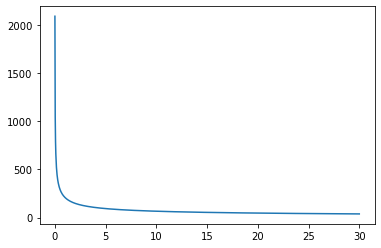

In [5]:
plt.plot(r,bulge_vel(r*1000,1,250,3500))

This model will have $V_b \rightarrow \infty$ as $r \rightarrow 0$

# Modified bulge model

For $0 < r < R_{in}$:

$$V^2{b}(r) = \frac{\alpha_{b} V^2_{in} r}{R_{in}}$$

For $r \geqslant R_{in}$:

$$V^2{b}(r) = \alpha_{b} V^2_{in} (\frac{r}{R_{in}})^{-1}$$

In [6]:
def bulge_vel_mod(r, A, Vin, Rd):
    if isinstance(r, float):
        if r < 0.2 * Rd:
            v = np.sqrt(A*Vin**2*r/(0.2*Rd))
        else:
            v = np.sqrt(A * Vin **2 * (r/(0.2*Rd)) ** -1)
    else:
        v = np.zeros(len(r))
        for i in range(len(r)):
            if r[i] < 0.2 * Rd:
                v[i] = np.sqrt(A*Vin**2*r[i]/(0.2*Rd))
            else:
                v[i] = np.sqrt(A * Vin **2 * (r[i]/(0.2*Rd)) ** -1)
    return v

Text(0.5, 1.0, 'MW Bulge [modified Di Paolo]')

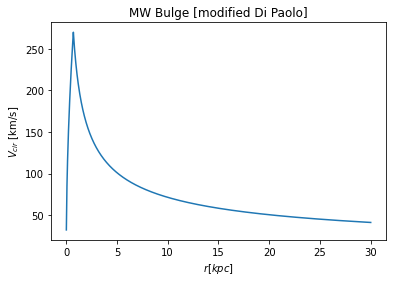

In [7]:
plt.plot(r,bulge_vel_mod(r*1000,1,270,3500))
plt.xlabel('$r [kpc]$')
plt.ylabel('$V_{cir}$ [km/s]')
plt.title('MW Bulge [modified Di Paolo]')

<ipython-input-3-feae343c4592>:21: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  bulge_mass, m_err = inte.quad(mass_integrand, 0, r, args=(SigBE, Rb))
<ipython-input-3-feae343c4592>:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  bulge_mass, m_err = inte.quad(mass_integrand, 0, r, args=(SigBE, Rb))


Text(0.5, 1.0, 'de Vauc vs Modified Di Paolo')

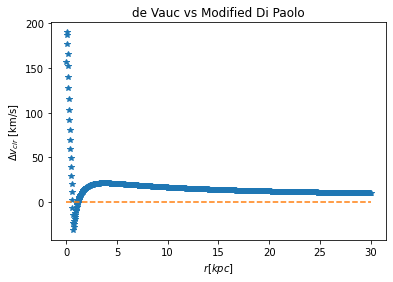

In [30]:
delta_v = np.zeros(len(r))
zero_line = np.zeros(len(r))
for i in range(len(r)):
    delta_v[i] = vcir_b(r[i]*1000,3.2E3, 0.5E3) - bulge_vel_mod(r[i]*1000,1,270,3500)
    
plt.plot(r,delta_v,'*')
plt.plot(r, zero_line, '--')
plt.xlabel('$r [kpc]$')
plt.ylabel('$\Delta v_{cir}$ [km/s]')
plt.title('de Vauc vs Modified Di Paolo')

# Exponential Disk Profile

(Sofue 2013 eqn 33)

$$V^2_d(r) = 4\pi G\Sigma_{0}R_dy^2[I_0(y)K_0(y) - I_1(y)K_1(y)]$$

where $y = \frac{r}{2R_d}$

In [9]:
def disk_vel(r, SigD, Rd):
    '''
    :param SigD: Central surface density for the disk [M_sol/pc^2]
    :param Rd: The scale radius of the disk [pc]
    :r: The distance from the centre [pc]
    :return: The rotational velocity of the disk [km/s]
    '''
    # SigD, Rd = params

    y = r / (2 * Rd)

    bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
    vel2 = (4 * np.pi * G * SigD * y ** 2 * (Rd / (3.086e16)) * Msun) * bessel_component

    return np.sqrt(vel2) / 1000

In [10]:
Mdt = 2*np.pi*(8.44e2)*(3.5e3)**2
Mdt

64961852890.92974

Agrees with Sofue 2013, $M_d = 6.5 \times 10^{10} M_{\odot}$

Text(0.5, 1.0, 'MW Disk')

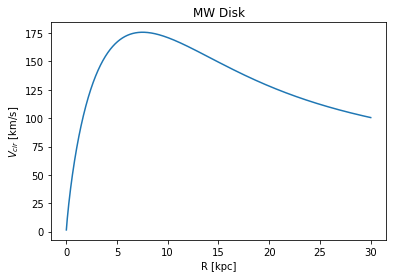

In [11]:
plt.plot(r, disk_vel(r*1000,8.44e2,3500))
plt.xlabel('R [kpc]')
plt.ylabel('$V_{cir}$ [km/s]')
plt.title('MW Disk')

The velocity curve is higher than what is presented in Sofue 2013 (Figure 20 [middle])

# Simplified Isothermal Halo Model

(Sofue 2013, eqn 51 & 52)

$$V_h = V_{\infty}\sqrt{1 - (\frac{R_h}{r}){tan}^{-1}(\frac{r}{R_h})}$$

where $V_{\infty} = \sqrt{4\pi G \rho_{0} R^2_h}$

In [12]:
v_inf = np.sqrt((4 * np.pi * G * 5.1e-3 * (Msun) * 12e3 ** 2) / (3.086e16))/1000 
v_inf

199.2433329270944

Sofue 2013 has $V_{\infty} = 200\text{km/s}$

In [13]:
def rho0_iso(Vinf, Rh):
    '''
    parameters:
    Vinf (rotational velocity): The rotational velocity when r approaches infinity (km/s)
    Rh (scale radius): The scale radius of the dark matter halo [pc]

    return: volume density of the isothermal halo (g/pc^3)
    '''
    return 0.740 * (Vinf / 200) **2 * (Rh/1000) ** (-2)


def rho_iso(r, Vinf, Rh):
    '''
    parameters:
    r (radius): The a distance from the centre (pc)
    Vinf (rotational velocity): The rotational velocity when r approaches infinity (km/s)
    Rh (scale radius): The scale radius of the dark matter halo (pc)

    return: volume density of the isothermal halo (g/pc^3)
    '''
    rho_0 = rho0_iso(Vinf, Rh)
    return rho_0 / (1 + (r / Rh) ** 2)


def integrand_h_iso(r, Vinf, Rh):
    '''
    parameters:
    r (radius): The a distance from the centre (pc)
    Vinf (rotational velocity): The rotational velocity when r approaches infinity (km/s)
    Rh (scale radius): The scale radius of the dark matter halo (pc)
    return: integrand for getting the mass of the isothermal halo
    '''

    return 4 * np.pi * (rho_iso(r, Vinf, Rh)) * r ** 2


def mass_h_iso(r, Vinf, Rh):
    '''
    parameters:
    r (radius): The a distance from the centre (pc)
    e (rotational velocity): The rotational velocity when r approaches infinity (km/s)
    f (scale radius): The scale radius of the dark matter halo (pc)

    return: mass of the isothermal halo (g)
    '''
    halo_mass, m_err = inte.quad(integrand_h_iso, 0, r, args=(Vinf, Rh))
    return halo_mass


def vel_h_iso(r, Vinf, Rh):
    '''
    parameters:
    r (radius): The a distance from the centre (pc)
    Vinf (rotational velocity): The rotational velocity when r approaches infinity (km/s)
    Rh (scale radius): The scale radius of the dark matter halo (pc)

    return: rotational velocity of the isothermal halo (pc/s)
    '''
    if isinstance(r, float):
        halo_mass = mass_h_iso(r, Vinf, Rh)
    else:
        halo_mass = np.zeros(len(r))
        for i in range(len(r)):
            halo_mass[i] = mass_h_iso(r[i], Vinf, Rh)

    vel2 = G * (halo_mass * Msun) / (r * 3.08E16)

    return np.sqrt(vel2)/1000

In [14]:
####################################################################################
def halo_vel_iso(r, rho0_h, Rh):
    '''
    :param r: The a distance from the centre (pc)
    :param rho_iso: The central density of the halo (M_sol/pc^3)
    :param Rh: The scale radius of the dark matter halo (pc)
    :return: rotational velocity
    '''
    v_inf = np.sqrt((4 * np.pi * G * rho0_h * (Msun) * Rh ** 2) / (3.086e16))/1000 #km/s
    if isinstance(r,float):
        # the part in the square root would be unitless
        vel = v_inf * np.sqrt(1 - ((Rh/r)*np.arctan2(r,Rh)))
    else:
        vel = np.zeros(len(r))
        for i in range(len(r)):
            vel[i] = v_inf * np.sqrt(1 - ((Rh/r[i])*np.arctan2(r[i],Rh)))
    return vel

#####################################################################################

Text(0.5, 1.0, 'MW Halo (Isothermal)')

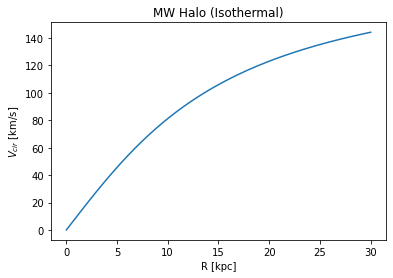

In [15]:
plt.plot(r,halo_vel_iso(r*1000,5.1e-3,12000),label='iso halo')
plt.xlabel('R [kpc]')
plt.ylabel('$V_{cir}$ [km/s]')
plt.title('MW Halo (Isothermal)')

# NFW Halo Model

(Sofue 2013, eqn 55, 54 & 57)

$$\rho_{NFW}(r) = \frac{\rho_{NFW}^{0}}{(r/R_h)(1+(r/R_h)^2)}$$

$$M_h(R) = 4\pi\int^{R}_0 \rho_{NFW}(r)r^2dr$$

$$V_h(R) = \sqrt{\frac{GM_h(R)}{R}}$$

In [16]:
def rho_NFW(r, rho0_h, Rh):
    '''
    parameters:
    r (radius): The a distance from the centre (pc)
    rho0_h (central density): The central density of the halo (M_sol/pc^3)
    Rh (scale radius): The scale radius of the dark matter halo (pc)

    return: volume density of the isothermal halo (M/pc^3)
    '''
    return rho0_h / ((r / Rh) * ((1 + (r / Rh)) ** 2))


def integrand_h_NFW(r, rho0_h, Rh):
    '''
    parameters:
    r (radius): The a distance from the centre (pc)
    rho0_h (central density): The central density of the halo (M_sol/pc^3)
    Rh (scale radius): The scale radius of the dark matter halo (pc)

    return: integrand for getting the mass of the isothermal halo
    '''

    return 4 * np.pi * (rho_NFW(r, rho0_h, Rh)) * r ** 2


def mass_h_NFW(r, rho0_h, Rh):
    '''
    parameters:
    r (radius): The a distance from the centre (pc)
    rho0_h (central density): The central density of the halo (M_sol/pc^3)
    Rh (scale radius): The scale radius of the dark matter halo (pc)

    return: mass of the isothermal halo (g)
    '''
    halo_mass, m_err = inte.quad(integrand_h_NFW, 0, r, args=(rho0_h, Rh))
    return halo_mass


def vel_h_NFW(r, rho0_h, Rh):
    '''
    parameters:
    r (radius): The a distance from the centre (pc)
    rho0_h (central density): The central density of the halo (M_sol/pc^3)
    Rh (scale radius): The scale radius of the dark matter halo (pc)

    return: rotational velocity of the NFW halo (pc/s)
    '''
    if isinstance(r, float):
        halo_mass = mass_h_NFW(r, rho0_h, Rh)
    else:
        halo_mass = np.zeros(len(r))
        for i in range(len(r)):
            halo_mass[i] = mass_h_NFW(r[i], rho0_h, Rh)

    vel2 = G * (halo_mass * Msun) / (r * 3.08E16)

    return np.sqrt(vel2)/1000

In [17]:
def halo_vel_NFW(r, rho0_h, Rh):
    if isinstance(r, float):
        halo_mass = 4*np.pi*rho0_h*Rh**3*((-r/(Rh+r)) + np.log(Rh + r) - np.log(Rh))
    else:
        halo_mass = np.zeros(len(r))
        for i in range(len(r)):
            halo_mass[i] = 4*np.pi*rho0_h*Rh**3*((-r[i]/(Rh+r[i])) + np.log(Rh + r[i]) - np.log(Rh))
    vel2 = G * (halo_mass * Msun) / (r * 3.086e16)
    return np.sqrt(vel2)/1000

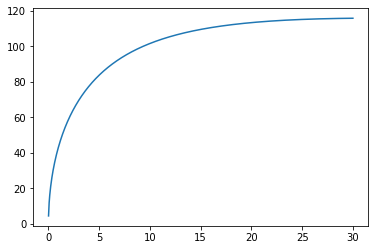

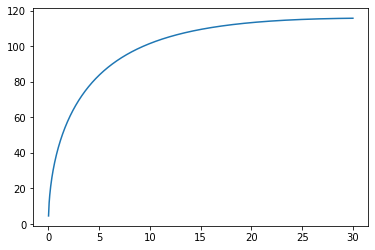

In [18]:
plt.plot(r,vel_h_NFW(r*1000,5.1e-3,15000),label='nfw halo')
plt.show()
plt.plot(r,halo_vel_NFW(r*1000,5.1e-3,15000),label='nfw halo')

Generated using the same parameter values as the Isothermal halo. We can see that the velocity is a lot lower than what is presented in Sofue 2013

# Burket Halo Model 

(Sofue 2013, eqn 56, 54, & 57)

$$\rho_{Bur}(r) = \frac{\rho_{Bur}^{0}}{(1+(r/R_h))(1+(r/R_h)^2)}$$

$$M_h(R) = 4\pi\int^{R}_0 \rho_{bur}(r)r^2dr$$

$$V_h(R) = \sqrt{\frac{GM_h(R)}{R}}$$

In [19]:
def rho_Burket(r, rho0_h, Rh):
    '''
    :param r: The distance from the centre (pc)
    :param rho0_h: The central density of the halo (M_sol/pc^3)
    :param Rh: The scale radius of the dark matter halo (pc)
    :return: volume density of the isothermal halo (M/pc^3)
    '''
    return (rho0_h) / ((1 + (r/Rh)) * (1 + (r/Rh) ** 2))


def integrand_h_Burket(r, rho0_h, Rh):
    '''
    :param r: The a distance from the centre (pc)
    :param rho0_h: The central density of the halo (M_sol/pc^3)
    :param Rh: The scale radius of the dark matter halo (pc)
    :return: integrand for getting the mass of the isothermal halo
    '''
    return 4 * np.pi * (rho_Burket(r, rho0_h, Rh)) * r ** 2


def mass_h_Burket(r, rho0_h, Rh):
    '''
    :param r: The a distance from the centre (pc)
    :param rho0_h: The central density of the halo (M_sol/pc^3)
    :param Rh: The scale radius of the dark matter halo (pc)
    :return: mass of the isothermal halo (g)
    '''
    halo_mass, m_err = inte.quad(integrand_h_Burket, 0, r, args=(rho0_h, Rh))
    return halo_mass


def vel_h_Burket(r, rho0_h, Rh):
    '''
    r (radius): The a distance from the centre [pc]
    rho0_h (central density): The central density of the halo [M_sol/pc^3]
    Rh (scale radius): The scale radius of the dark matter halo [pc]
    :return: rotational velocity of the Burket halo [km/s]
    '''
    if isinstance(r, float):
        halo_mass = mass_h_Burket(r, rho0_h, Rh)
    else:
        halo_mass = np.zeros(len(r))
        for i in range(len(r)):
            halo_mass[i] = mass_h_Burket(r[i], rho0_h, Rh)

    vel2 = G * (halo_mass * Msun) / (r * 3.08E16)

    return np.sqrt(vel2)/1000

In [20]:
def halo_vel_bur(r,rho0_h, Rh):
    if isinstance(r, float):
        halo_mass = np.pi * (-rho0_h) * (Rh**3) * (-np.log(Rh**2 + r**2) - 2*np.log(Rh + r) + 2*np.arctan2(r, Rh) + np.log(Rh**2)\
                                               + 2*np.log(Rh) - 2*np.arctan2(0, Rh))
    else:
        halo_mass = np.zeros(len(r))
        for i in range(len(r)):
            halo_mass[i] = np.pi * (-rho0_h) * (Rh**3) * (-np.log(Rh**2 + r[i]**2) - 2*np.log(Rh + r[i]) + 2*np.arctan2(r[i], Rh) + np.log(Rh**2)\
                                               + 2*np.log(Rh) - 2*np.arctan2(0, Rh))
    vel2 = G * (halo_mass * Msun) / (r * 3.086e16)
    return np.sqrt(vel2)/1000

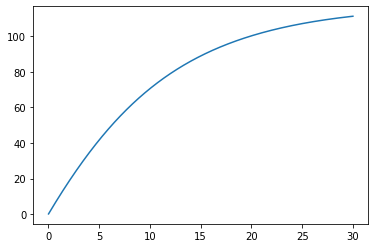

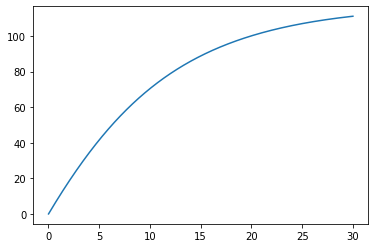

In [21]:
plt.plot(r,vel_h_Burket(r*1000,5.1e-3,15000),label='bur halo')
plt.show()
plt.plot(r,halo_vel_bur(r*1000,5.1e-3,15000),label='bur halo')

Generated using the same parameter values as the Isothermal halo. We can see that the velocity is a lot lower than what is presented in Sofue 2013

# Putting everything together

In [22]:
# Isothermal
def vel_tot_iso(r, params):
    A, Vin, SigD, Rd, Vinf, Rh = params

    r_pc = r * 1000
    Rd_pc = Rd * 1000
    Rh_pc = Rh * 1000

    Vbulge = bulge_vel_mod(r_pc, A, Vin, Rd_pc)
    Vdisk = disk_vel(r_pc, SigD, Rd_pc)
    Vhalo = vel_h_iso(r_pc, Vinf, Rh_pc)
    v2 = Vbulge ** 2 + Vdisk ** 2 + Vhalo ** 2

    return np.sqrt(v2)

def vel_tot_iso_alt(r, params):
    A, Vin, SigD, Rd, rho0_h, Rh = params

    r_pc = r * 1000
    Rd_pc = Rd * 1000
    Rh_pc = Rh * 1000

    Vbulge = bulge_vel_mod(r_pc, A, Vin, Rd_pc)
    Vdisk = disk_vel(r_pc, SigD, Rd_pc)
    Vhalo = halo_vel_iso(r_pc, rho0_h, Rh_pc)
    v2 = Vbulge ** 2 + Vdisk ** 2 + Vhalo ** 2

    return np.sqrt(v2)

#------------------------------------------------------------------------------------
# NFW
def vel_tot_NFW(r, params):
    A, Vin, SigD, Rd, rho0_h, Rh = params

    r_pc = r * 1000
    Rd_pc = Rd * 1000
    Rh_pc = Rh * 1000

    Vbulge = bulge_vel_mod(r_pc, A, Vin, Rd_pc)
    Vdisk = disk_vel(r_pc, SigD, Rd_pc)
    Vhalo = halo_vel_NFW(r_pc, rho0_h, Rh_pc)
    v2 = Vbulge ** 2 + Vdisk ** 2 + Vhalo ** 2

    return np.sqrt(v2)
#------------------------------------------------------------------------------------
# Burket
def vel_tot_bur(r, params):
    A, Vin, SigD, Rd, rho0_h, Rh = params

    r_pc = r * 1000
    Rd_pc = Rd * 1000
    Rh_pc = Rh * 1000

    Vbulge = bulge_vel_mod(r_pc, A, Vin, Rd_pc)
    Vdisk = disk_vel(r_pc, SigD, Rd_pc)
    Vhalo = halo_vel_bur(r_pc, rho0_h, Rh_pc)
    v2 = Vbulge ** 2 + Vdisk ** 2 + Vhalo ** 2

    return np.sqrt(v2)

Text(0.5, 1.0, 'Recreating Rotation curve of the Milky Way')

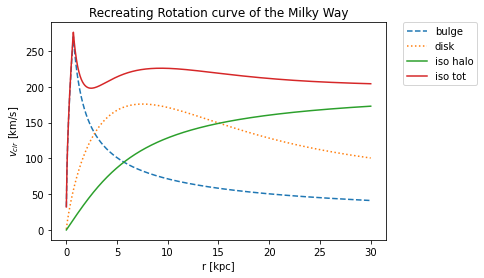

In [23]:
plt.plot(r,bulge_vel_mod(r*1000,1,270,3500),'--',label='bulge')
plt.plot(r, disk_vel(r*1000,8.44e2,3500),':',label='disk')
plt.plot(r,vel_h_iso(r*1000,200,5500),label='iso halo')
plt.plot(r,vel_tot_iso(r,[1,270,8.44e2,3.5,200,5.5]),label='iso tot')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('r [kpc]')
plt.ylabel('$v_{cir}$ [km/s]')
plt.title('Recreating Rotation curve of the Milky Way')

Text(0.5, 1.0, 'Recreating Rotation curve of the Milky Way')

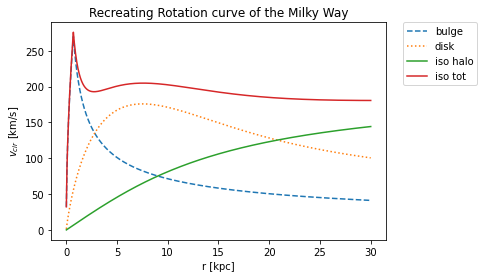

In [24]:
plt.plot(r,bulge_vel_mod(r*1000,1,270,3500),'--',label='bulge')
plt.plot(r, disk_vel(r*1000,8.44e2,3500),':',label='disk')
plt.plot(r,halo_vel_iso(r*1000,5.1e-3,12000),label='iso halo')
plt.plot(r,vel_tot_iso_alt(r,[1,270,8.44e2,3.5,5.1e-3,12]),label='iso tot')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('r [kpc]')
plt.ylabel('$v_{cir}$ [km/s]')
plt.title('Recreating Rotation curve of the Milky Way')

# Values of the parameters

$$\alpha_b = 1$$
$$V_{in} = 250 \text{km/s}$$
$$\Sigma_{dc} = 8.44\times10^2 M_{\odot}/{pc}^2$$
$$R_d = 3.5 \text{kpc}$$
$$\rho_{hc} = 5.1 \times 10^{-3} M_{\odot}/{pc}^3$$
$$R_h = 12 \text{kpc}$$

Text(0.5, 1.0, 'Recreating Rotation curve of the Milky Way')

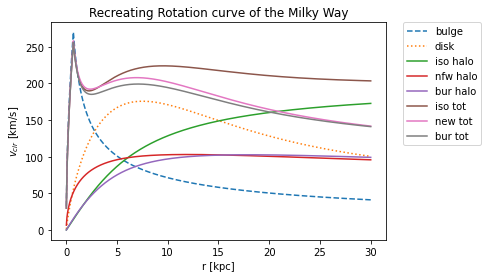

In [25]:
plt.plot(r,bulge_vel_mod(r*1000,1,270,3500),'--',label='bulge')
plt.plot(r, disk_vel(r*1000,8.44e2,3500),':',label='disk')
plt.plot(r,vel_h_iso(r*1000,200,5500),label='iso halo')
plt.plot(r,vel_h_NFW(r*1000,3e-2,5500),label='nfw halo')
plt.plot(r,halo_vel_bur(r*1000,3e-2,5500),label='bur halo')
plt.plot(r,vel_tot_iso(r,[1,250,8.44e2,3.5,200,5.5]),label='iso tot')
plt.plot(r,vel_tot_NFW(r,[1,250,8.44e2,3.5,5.1e-3,12]),label='new tot')
plt.plot(r,vel_tot_bur(r,[1,250,8.44e2,3.5,5.1e-3,12]),label='bur tot')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('r [kpc]')
plt.ylabel('$v_{cir}$ [km/s]')
plt.title('Recreating Rotation curve of the Milky Way')

Text(0.5, 1.0, 'Recreating MW RC')

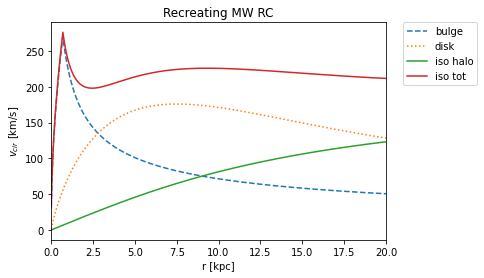

In [26]:
plt.plot(r,bulge_vel_mod(r*1000,1,270,3500),'--',label='bulge')
plt.plot(r, disk_vel(r*1000,8.44e2,3500),':',label='disk')
plt.plot(r,halo_vel_iso(r*1000,5.1e-3,12000),label='iso halo')
#plt.plot(r,halo_vel_NFW(r*1000,5.1e-3,12000),label='nfw halo')
#plt.plot(r,halo_vel_bur(r*1000,5.1e-3,12000),label='bur halo')
plt.plot(r,vel_tot_iso(r,[1,270,8.44e2,3.5,200,5.5]),label='iso tot')
#plt.plot(r,vel_tot_NFW(r,[1,250,8.44e2,3.5,5.1e-3,12]),label='new tot')
#plt.plot(r,vel_tot_bur(r,[1,250,8.44e2,3.5,5.1e-3,12]),label='bur tot')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('r [kpc]')
plt.ylabel('$v_{cir}$ [km/s]')
plt.xlim(0,20)
plt.title('Recreating MW RC')

This matches Sofue 2013, Fig. 6

# Now Using slightly different parameter values 
(Obtained by tweaking)

$$\alpha_b = 1$$
$$V_{in} = 250 \text{km/s}$$
$$\Sigma_{dc} = 8.44\times10^2 M_{\odot}/{pc}^2$$
$$R_d = 3.5 \text{kpc}$$
$$\rho_{hc, iso} = 7 \times 10^{-3} M_{\odot}/{pc}^3$$
$$R_{hc, iso} = 16 \text{kpc}$$
$$\rho_{hc, NFW} = 8 \times 10^{-3} M_{\odot}/{pc}^3$$
$$R_{hc, NFW} = 16 \text{kpc}$$
$$\rho_{hc, bur} = 1.2 \times 10^{-2} M_{\odot}/{pc}^3$$
$$R_{hc,bur} = 16 \text{kpc}$$

Text(0.5, 1.0, 'Rotation curve of the Milky Way')

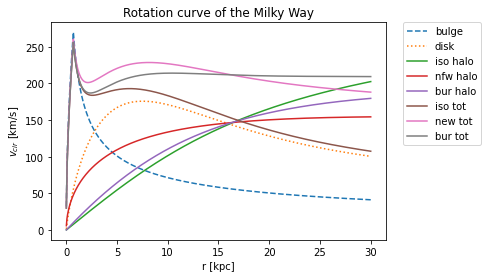

In [27]:
plt.plot(r,bulge_vel_mod(r*1000,1,270,3500),'--',label='bulge')
plt.plot(r, disk_vel(r*1000,8.44e2,3500),':',label='disk')
plt.plot(r,halo_vel_iso(r*1000,7e-3,16000),label='iso halo')
plt.plot(r,halo_vel_NFW(r*1000,8e-3,16000),label='nfw halo')
plt.plot(r,halo_vel_bur(r*1000,1.2e-2,16000),label='bur halo')
plt.plot(r,vel_tot_iso(r,[1,250,8.44e2,3.5,7e-3,16]),label='iso tot')
plt.plot(r,vel_tot_NFW(r,[1,250,8.44e2,3.5,8e-3,16]),label='new tot')
plt.plot(r,vel_tot_bur(r,[1,250,8.44e2,3.5,1.2e-2,16]),label='bur tot')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('r [kpc]')
plt.ylabel('$v_{cir}$ [km/s]')
plt.title('Rotation curve of the Milky Way')

$$\rho_{iso} (R) = \frac{\rho_{iso}^{0}}{1+(R/r_h)^2}$$
$$\rho_{iso}^{0} = 0.74(\frac{V_{\infty}}{200km/s})(\frac{h}{1 kpc})^{-2} M_{\odot}pc^{-3}$$
$$M(R) = 4\pi\int^{R}_0 \rho_{iso}(R)R^2dR$$

In [28]:
0.740 * (200 / 200) **2 * (5500/1000) ** (-2)

0.02446280991735537

In [29]:
v_inf = np.sqrt((4 * np.pi * G * 5.1e-3* (Msun) * 12000 ** 2) / (3.086e16))/1000
v_inf

199.2433329270944